In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

# Comparison manual and numpy spectrogram with Hamming window
- Part 1: Comparison of signal in frequency domain with and without application of Hamming window.
- Part 2: Comparison of manual and numpy spectrogram.
- Part 3: Application of numpy spectrogram to measured data.

### Part 1: Comparison of signal in frequency domain with and without application of Hamming window.

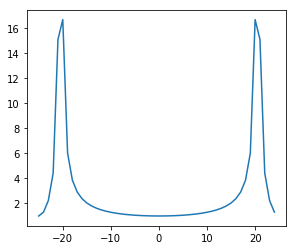

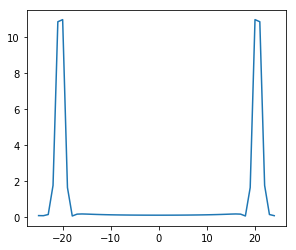

In [31]:
# Difference without and with Hamming window. Application of Hamming window redusces leakage. 
f = 20.5
N = 50
t = np.linspace(0,0.98,N)
s = np.cos(2*np.pi*f*t)

def plot_func(s,N):
    S = np.fft.fft(s)
    f = np.arange(N)-N/2
    S1 = list(S[0:int(N/2)])
    S2 = list(S[int(N/2):N])
    S = np.array(S2+S1)
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
    ax.plot(f,abs(S))
    
plot_func(s,N)

s1 = s*np.hamming(N)
plot_func(s1,N)

### Part 2: Comparison of manual and numpy spectrogram.

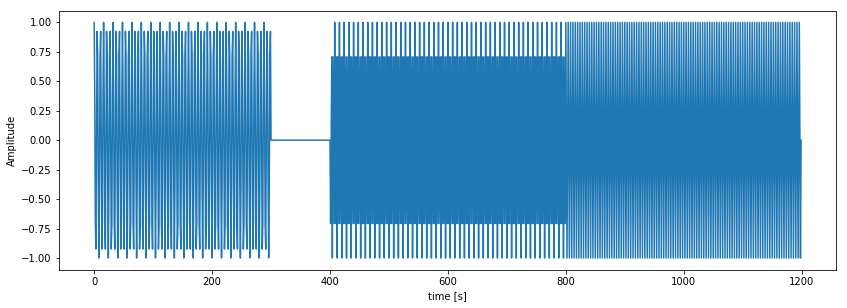

In [11]:
# Create signal with 3 different frequencies that follow each other in time. 
f1,f2,f3 = 1500.,3000.,2000.                        # signal frequencies
fs = 8000.                                          # samplig frequency
ts = 1/fs
N = 1200                                            # Number of seconds in signal
n = np.arange(N)
s = np.zeros(N)                                     # [s]
s[0:301] = np.cos(2*np.pi*f1*ts*n[0:301])           # signal time period 1
s[401:801] = np.cos(2*np.pi*f2*ts*n[401:801])       # signal time period 2
s[801:-1] = np.cos(2*np.pi*f3*ts*n[801:-1])         # signal time period 3
fig = plt.figure(figsize=[12,4])
ax = fig.add_axes([0.05,0.05,0.9,0.9])
ax.set_xlabel('time [s]')
ax.set_ylabel('Amplitude')
ax.plot(n,s)

In [12]:
psize = 20                                            # number of seconds in frequency bin
p = np.zeros((1+int((N-psize)/10),psize))             # bins for signal in frequency domain
P = np.zeros((1+int((N-psize)/10),psize))             
P2 = np.zeros((1+int((N-psize)/10),int(psize/2)))
for i in range(len(p)):
    p[i] = s[10*i:10*i+20]*np.hamming(psize)          # Apply Hamming window to time signal
    P[i] = np.fft.fft(p[i])                           # Apply fast fourier transform to signal -> freq. domain
    P2[i] = 2*P[i][0:int(psize/2)]                    # Add negative to positive frequencies

D:\Programs\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


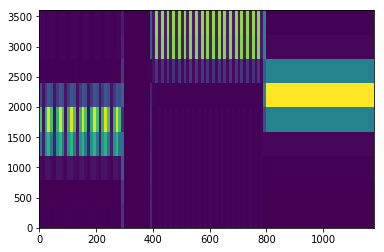

In [13]:
# Manual spectrogram
t = np.linspace(0,1180,119)
fn = np.arange(0,fs/2,fs/psize)
plt.pcolormesh(t, fn, np.transpose(abs(P2)))          

Text(0.5,0,'Time [sec]')

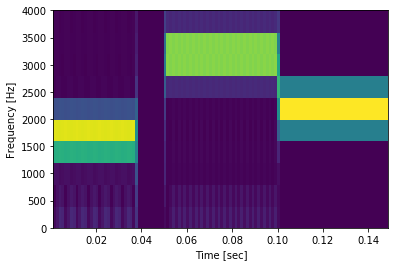

In [14]:
# Numpy spectrogram
fsamp = 8000
f,t,Sxx = signal.spectrogram(s, fs=fsamp, window='hamming', nperseg=psize, noverlap=psize/2, mode='magnitude')
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

### Part 3: Application of numpy spectrogram to measured data.

In [24]:
# Load measured data
RM33 = np.loadtxt("RM33.txt")
BAPP = np.loadtxt("BAPP.txt")
print (len(RM33), len(BAPP))
RM33 = RM33[200*125:-1]
BAPP = BAPP[200*125:-1]
print (len(RM33), len(BAPP))
RM33 = RM33[0:100*200]
BAPP = BAPP[0:100*200]
print (len(RM33), len(BAPP))

69970 48001
44969 23000
20000 20000


In [25]:
fs = 200           # original sampling frequency
tw = 2             # duration of window
wsize = fs*tw      # number of points in window

D:\Programs\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


Text(0.5,0,'Time [sec]')

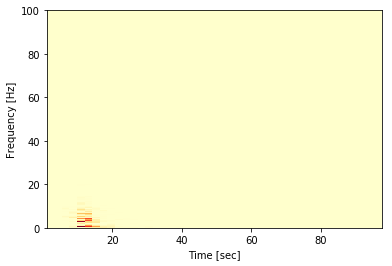

In [26]:
f,t,Sxx = signal.spectrogram(RM33,fs=fs,window='hamming',nperseg=500,nfft=40000)
plt.pcolormesh(t, f, Sxx, cmap='YlOrRd')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

D:\Programs\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


Text(0.5,0,'Time [sec]')

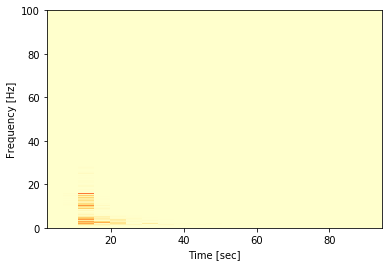

In [27]:
f,t,Sxx = signal.spectrogram(BAPP,fs=fs,window='hamming',nperseg=1000,nfft=40000)
plt.pcolormesh(t, f, Sxx, cmap='YlOrRd')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')